# KL Intuition notebook

In [2]:
# KL Divergence Intuition Notebook

# 📌 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, entropy

sns.set(style='whitegrid')

# 📘 Helper: KL Divergence (Discrete)
def kl_divergence_discrete(p, q):
    p = np.asarray(p, dtype=np.float64)
    q = np.asarray(q, dtype=np.float64)
    p /= p.sum()
    q /= q.sum()
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# 📘 Helper: KL Divergence (Continuous with Normal Distribution)
def kl_divergence_normal(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q/sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2)/(2*sigma_q**2) - 0.5



KL Divergence (Discrete): 0.1168


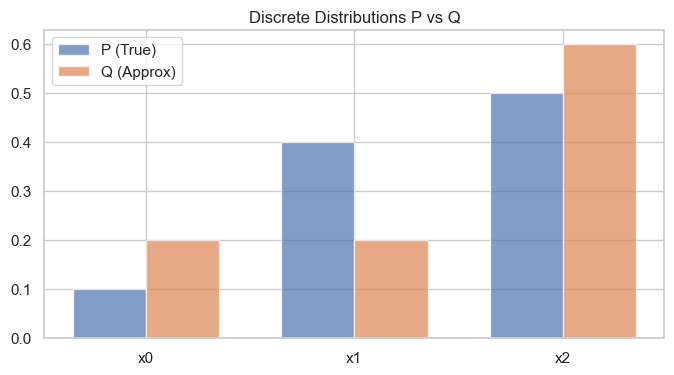

In [3]:
# -----------------------------------------------
# 🔹 Part 1: Discrete KL Divergence
# -----------------------------------------------

# Define two simple distributions
p = [0.1, 0.4, 0.5]   # True distribution
q = [0.2, 0.2, 0.6]   # Approximate distribution

kl_d = kl_divergence_discrete(p, q)
print(f"KL Divergence (Discrete): {kl_d:.4f}")

# 🔹 Plotting
x = np.arange(len(p))
bar_width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x, p, width=bar_width, label='P (True)', alpha=0.7)
plt.bar(x + bar_width, q, width=bar_width, label='Q (Approx)', alpha=0.7)
plt.xticks(x + bar_width / 2, [f"x{i}" for i in range(len(p))])
plt.title("Discrete Distributions P vs Q")
plt.legend()
plt.show()


KL Divergence (Continuous Normal): 0.3499


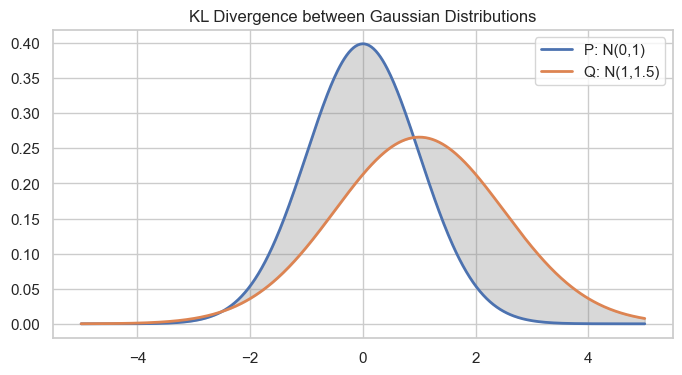

In [ ]:
# -----------------------------------------------
# 🔹 Part 2: Continuous KL Divergence (Gaussian)
# -----------------------------------------------

mu_p, sigma_p = 0, 1
mu_q, sigma_q = 1, 1.5

kl_cont = kl_divergence_normal(mu_p, sigma_p, mu_q, sigma_q)
print(f"KL Divergence (Continuous Normal): {kl_cont:.4f}")

# 🔹 Plot Gaussian distributions
x = np.linspace(-5, 5, 500)
p_pdf = norm.pdf(x, mu_p, sigma_p)
q_pdf = norm.pdf(x, mu_q, sigma_q)

plt.figure(figsize=(8, 4))
plt.plot(x, p_pdf, label='P: N(0,1)', lw=2)
plt.plot(x, q_pdf, label='Q: N(1,1.5)', lw=2)
plt.fill_between(x, p_pdf, q_pdf, color='gray', alpha=0.3)
plt.title("KL Divergence between Gaussian Distributions")
plt.legend()
plt.show()

# If both distributions are very similar, KL divergence tends to 0


In [7]:
# -----------------------------------------------
# 🔹 Part 3: KL Asymmetry Demonstration
# -----------------------------------------------

kl_pq = kl_divergence_normal(mu_p, sigma_p, mu_q, sigma_q)
kl_qp = kl_divergence_normal(mu_q, sigma_q, mu_p, sigma_p)
print(f"KL(P || Q): {kl_pq:.4f}")
print(f"KL(Q || P): {kl_qp:.4f}")

# Summary Message
print("\n✅ KL divergence is not symmetric!")
print("It measures how well Q approximates P, not the other way around.")

KL(P || Q): 0.3499
KL(Q || P): 0.7195

✅ KL divergence is not symmetric!
It measures how well Q approximates P, not the other way around.
